# **Использование различных оптимизаторов для минимизации весов нейронных сетей на основе набора данных MNIST**

MNIST - является классических набором данных для задачи распознавания рукописных цифр.

Ваш ИСУ id и ФИО:

*ВАШ ИСУ ID И ФИО ЗДЕСЬ*

Гафурова Фарангиз Фуркатовна

373432

**Задание:**
1. Обучить и измерить точность нейросетей с различными предложенными оптимизаторами из библиотеки PyTorch
2. Построить графики длительности обучения, точности результатов, загрузки CPU и использования оперативной памяти.
3. Сделать анализ полученных результатов. (разде 9)
4. Добавить собственные оптимизаторы из коллекции библиотеки Pytorch.
5. Повторить шаги 2-3.
6. *Можно попробовать оптимизаторы из других библиотек, но не все они могут быть совместимы с Pytorch архитектурой (см. раздел 10).

Так как нейронные сети могут обучаться достаточно долго, то запускать их можно по одной, чтобы не потерять результаты.

По указаной же выше причине, можно сначала поставить нейронные сети тренироваться, а в это время заняться изучением теоретической шпаргалки в разделе 1.

В разделе 9, секцию А можно заполнять, пока нейронные сети ещё учатся.

In [1]:
!pip install --upgrade torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

### **Советы для студентов**
1. Для методов второго порядка (например, Ньютона) уменьшайте размерность данных (например, используйте `28x28 → 14x14`), чтобы гессиан не занимал слишком много памяти.
2. Экспериментируйте с `batch_size` для баланса между памятью и скоростью.
3. Используйте `torch.jit` для оптимизации вычислений.

#### **1. Теоретическая шпаргалка**
### **1. Основы методов оптимизации**
#### **1.1 Градиентный спуск и его модификации**
- **Формула обновления параметров**:  
  $ \theta_{t+1} = \theta_t - \eta \nabla L(\theta_t) $,  
  где $ \eta $ — learning rate, $ \nabla L $ — градиент функции потерь.
- **Стохастический градиентный спуск (SGD)**:  
  Использование подвыборки (батча) для оценки градиента.  
  Плюсы: низкая вычислительная стоимость.  
  Минусы: шум, медленная сходимость.
- **Метод моментов**:  
  $ v_{t+1} = \beta v_t + (1-\beta) \nabla L(\theta_t) $,  
  $ \theta_{t+1} = \theta_t - \eta v_{t+1} $.  
  Идея: инерция для подавления шума.

#### **1.2 Методы второго порядка**
- **Метод Ньютона**:  
  $ \theta_{t+1} = \theta_t - H^{-1}(\theta_t) \nabla L(\theta_t) $,  
  где $ H $ — гессиан.  
  Проблемы: вычисление $ H^{-1} $ для больших моделей ($ O(n^3) $).
- **Квазиньютоновские методы (L-BFGS)**:  
  Аппроксимация гессиана с помощью истории градиентов.  
  Преимущества: меньше памяти, чем у полного BFGS.

#### **1.3 Адаптивные методы**
- **RMSProp**:  
  Адаптивный шаг на основе скользящего среднего квадратов градиентов:  
  $ E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma) g_t^2 $,  
  $ \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t $.  
- **Adam**:  
  Комбинация моментов первого и второго порядка:  
  $ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $,  
  $ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $,  
  $ \theta_{t+1} = \theta_t - \frac{\eta \cdot \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $.  
  Здесь $ \hat{m}_t $ и $ \hat{v}_t $ — bias-corrected оценки.

---

### **2. Связь с системами нелинейных уравнений**
#### **2.1 Постановка задачи**
- Система уравнений: $ F(\theta) = 0 $, где $ F: \mathbb{R}^n \to \mathbb{R}^n $.  
- Для оптимизации: $ F(\theta) = \nabla L(\theta) = 0 $.

#### **2.2 Метод Ньютона для систем**
- Итерация: $ \theta_{t+1} = \theta_t - J^{-1}(\theta_t) F(\theta_t) $,  
  где $ J $ — якобиан $ F $.  
- Для оптимизации $ J = H $ (гессиан функции потерь).

#### **2.3 Квазиньютоновские методы**
- Аппроксимация $ J^{-1} $ без явного вычисления матрицы (L-BFGS).  
- Условие секущих: $ J_{t+1} (\theta_{t+1} - \theta_t) = F(\theta_{t+1}) - F(\theta_t) $.

---

### **3. Практические аспекты в глубоком обучении**
#### **3.1 Почему метод Ньютона не используется напрямую?**
- Вычислительная сложность: $ O(n^3) $ для обращения матрицы.  
- Память: хранение гессиана для $ n=10^6 $ параметров требует $ 10^{12} $ элементов.  
- Решение: квазиньютоновские методы и адаптивные оптимизаторы.

#### **3.2 Сравнение методов**
| **Метод**      | **Порядок** | **Память** | **Сходимость**       | **Гиперпараметры**   |
|----------------|-------------|------------|----------------------|----------------------|
| SGD            | 1-й         | $ O(n) $ | Медленная            | Learning rate        |
| Adam           | 1-й         | $ O(n) $ | Быстрая             | $ \beta_1, \beta_2 $ |
| L-BFGS         | 2-й         | $ O(mn) $ | Суперлинейная       | Размер истории ($ m $) |

#### **3.3 Адаптивные методы vs. методы второго порядка**
- **Adam/RMSProp**: Хороши для noisy gradients, не требуют точного вычисления кривизны.  
- **L-BFGS**: Эффективен на гладких задачах, но чувствителен к шуму и требует точного линейного поиска.

---

### **4. Ключевые концепции для анализа**
#### **4.1 Скорость сходимости**
- Линейная (SGD), суперлинейная (L-BFGS), адаптивная (Adam).  
- Теоретическая основа: условия Липшица для градиента и гессиана.

#### **4.2 Память и вычислительная стоимость**
- **Методы 1-го порядка**: $ O(n) $ — хранение градиентов.  
- **Методы 2-го порядка**: $ O(mn) $ — хранение истории градиентов (L-BFGS).  
- **Время на итерацию**: SGD — $ O(batch \cdot n) $, L-BFGS — $ O(m \cdot batch \cdot n) $.

#### **4.3 Проблемы обучения**
- **Застревание в локальных минимумах**: Как методы с моментом (Adam) помогают их избежать.  
- **Сглаживание шума**: Роль экспоненциального скользящего среднего в Adam.

---

### **5. Визуализации для понимания**
1. **График ландшафта функции потерь**:  
   - Как методы 1-го и 2-го порядка двигаются к минимуму.

2. **Графики сходимости**:  
   - Сравнение loss vs. итерации для SGD, Adam, L-BFGS.  
   - Пример из [статьи](https://debuggercafe.com/wp-content/uploads/2020/06/adam_result_mnist.png):  
     ![Optimizers Comparison](https://debuggercafe.com/wp-content/uploads/2020/06/adam_result_mnist.png) .

---

### **6. Рекомендуемые дополнительные источники**
1. **Книги**:  
   - Boyd & Vandenberghe, "Convex Optimization" (Глава 9 — Методы Ньютона).  
   - Goodfellow et al., "Deep Learning" (Глава 8 — Оптимизация).  
2. **Статьи**:  
   - [Adam: A Method for Stochastic Optimization](https://arxiv.org/abs/1412.6980).  
   - [On the Limited Memory BFGS Method for Large Scale Optimization](https://link.springer.com/article/10.1007/BF01589116).  
3. **Лекции**:  
   - [CS231n: Optimization](https://cs231n.github.io/optimization-1/).  

# **Конец теоретической шпаргалки**
---

---

#### **2. Установка зависимостей**

In [2]:
!pip install memory_profiler psutil

---

#### **3. Предобработка данных MNIST**

In [33]:
import torch
from torchvision import datasets, transforms

device = torch.device('cuda')

# Загрузка данных
transform = transforms.Compose([
    transforms.ToTensor(),  # Конвертирует PIL.Image в тензор
    transforms.Normalize((0.5,), (0.5,))
])
# Загрузка данных
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform  # Применяем преобразования
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform
)



# Преобразование в DataLoader
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

---

#### **4. Определение модели (полносвязная сеть)**

In [34]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        return self.layers(x)


---

#### **5. Инструменты для мониторинга ресурсов**

In [35]:
import time
import psutil
from memory_profiler import memory_usage

def monitor_resources(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        start_mem = memory_usage(-1, interval=0.1)[0]
        process = psutil.Process()
        cpu_percent_start = process.cpu_percent(interval=None)

        result = func(*args, **kwargs)

        end_time = time.time()
        end_mem = memory_usage(-1, interval=0.1)[0]
        cpu_percent_end = process.cpu_percent(interval=None)

        metrics = {
            "time": end_time - start_time,
            "memory": end_mem - start_mem,
            "cpu": cpu_percent_end - cpu_percent_start
        }
        return result, metrics
    return wrapper


---

#### **6. Обучение модели с разными оптимизаторами**

In [36]:
@monitor_resources
def train_model(optimizer, model, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            def closure():
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                return loss
            loss = optimizer.step(closure)
    return model


In [37]:
def evaluate_model(model, test_loader):
    model.eval()  # Переводим модель в режим оценки
    correct = 0
    total = 0

    with torch.no_grad():  # Отключаем вычисление градиентов
        for data, targets in test_loader:
            data = data.to(device)
            targets = targets.to(device)

            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)

            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    return accuracy

---

#### **7. Сравнение методов**

In [38]:
results = {}

In [44]:
# По своему усмотрению Вы можете добавлять собственные оптимизаторы
methods = {
    "Adam": torch.optim.Adam,
    "L-BFGS": torch.optim.LBFGS,
    "SGD": torch.optim.SGD,
    "RMSProp": torch.optim.RMSprop,
    "RAdam": torch.optim.RAdam
}

In [39]:
def get_nn_score(opt):
        model = MLP().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = opt(model.parameters())
        trained_model, metrics = train_model(optimizer, model, criterion)
        accuracy = evaluate_model(trained_model, test_loader)
        return {"accuracy": accuracy, **metrics}

In [45]:
# Тренируем и оцениваем все варианты нейронных сетей с разными оптимизаторами (может быть долго, больше часа):
# for name, opt in methods.items():
   # results[name] = get_nn_score(opt)

# Или запускаем модели по одной (безопаснее, если захотим перезапустить или что-то сломается в процессе, чтобы не потерять прогресс)
results["Adam"] = get_nn_score(methods["Adam"])

In [50]:
results["L-BFGS"] = get_nn_score(methods["L-BFGS"])

In [47]:
results["SGD"] = get_nn_score(methods["SGD"])

In [48]:
results["RMSProp"] = get_nn_score(methods["RMSProp"])

In [49]:
results["RAdam"] = get_nn_score(methods["RAdam"])

Пока обучаются нейронные сети, можете переходить в раздел 9 к секции А, она не требует результатов запуска нейронных сетей.

---

#### **8. Визуализация результатов**
- **График точности**:

Text(0.5, 1.0, 'Accuracy Comparison')

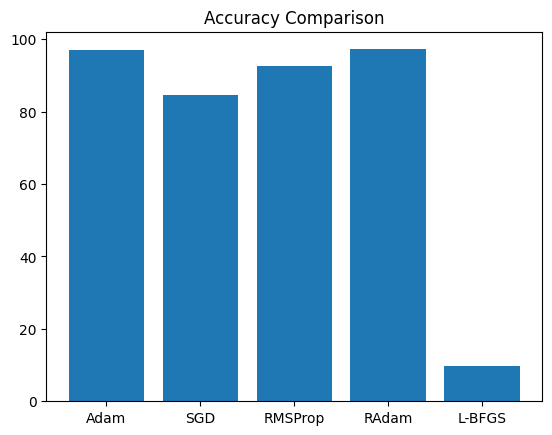

In [51]:
  import matplotlib.pyplot as plt

  plt.bar(results.keys(), [v["accuracy"] for v in results.values()])
  plt.title("Accuracy Comparison")

- **Графики времени обучения**:

Text(0.5, 1.0, 'Training time Comparison')

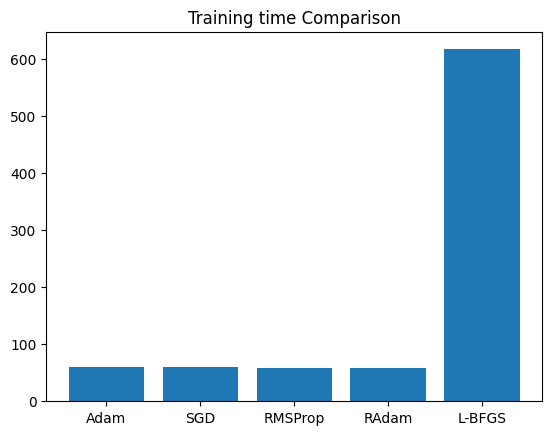

In [52]:
  plt.bar(results.keys(), [v["time"] for v in results.values()])
  plt.title("Training time Comparison")

- **Графики пямяти**:

Text(0.5, 1.0, 'Training RAM usage Comparison')

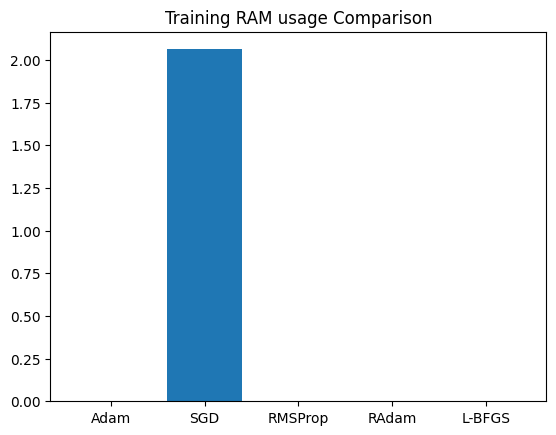

In [53]:
  plt.bar(results.keys(), [v["memory"] for v in results.values()])
  plt.title("Training RAM usage Comparison")

- **График потребления CPU**

Text(0.5, 1.0, 'Training CPU usage Comparison')

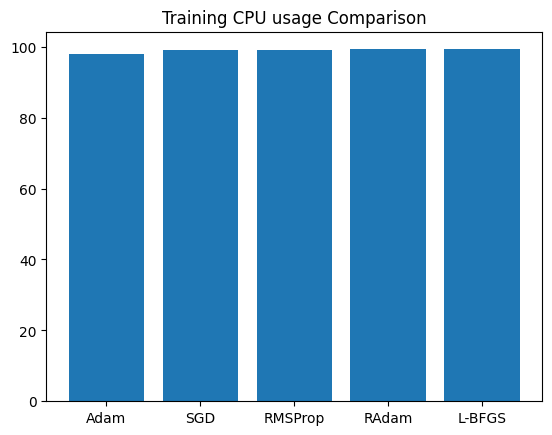

In [54]:
  plt.bar(results.keys(), [v["cpu"] for v in results.values()])
  plt.title("Training CPU usage Comparison")

---

#### **9. Анализ полученных результатов:**

### **А. Математические основы методов**
1. **Связь с изученными методами**  
   - Какой из оптимизаторов (напр., L-BFGS, Adam) ближе всего к методу Ньютона? В чём их сходство и различия?  
   - Почему в Adam используется адаптивный шаг, и как это связано с идеями метода градиентного спуска?  
   - Для методов второго порядка (например, L-BFGS):  
     - Как вычисляется приближение гессиана, и почему это важно для сходимости?  
     - Почему полный метод Ньютона редко применяется в глубоком обучении?  

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

 - L - BFGS является приближением метода Ньютона. Оба метода используют информацию о второй производной (в случае L - BFGS, это приближенная информация) для ускорения сходимости. Метод Ньютона использует гессиан для определения направления поиска, а L - BFGS приближает гессиан с помощью информации о предыдущих градиентах. Таким образом, они оба пытаются учесть кривизну функции, что позволяет им сходиться к оптимуму быстрее, чем методы первого порядка.

Различие: Полный метод Ньютона требует вычисления и обратного матрицы гессиана на каждой итерации, что вычислительно очень дорогостояло, особенно для больших моделей. L - BFGS, с другой стороны, использует ограниченную память для хранения информации о предыдущих градиентах и аппроксимирует гессиан, что делает его более применимым для задач глубокого обучения с большим количеством параметров.

- Adam:

Adam использует адаптивный шаг, потому что он учитывает как первый момент (среднее значение градиента), так и второй момент (дисперсию градиента). Это позволяет ему адаптировать скорость обучения для каждого параметра модели индивидуально. В идеях метода градиентного спуска, шаг размера определяет, насколько далеко мы движемся в направлении антиградиента на каждой итерации. Adam адаптирует этот шаг, чтобы учитывать темп изменения каждого параметра. Если градиент для определенного параметра стабильно велик, Adam уменьшает шаг, чтобы избежать слишком больших скачков и не пропустить минимум. Если градиент маленький, шаг может быть увеличен, чтобы ускорить сходимость.

- Методы второго порядка:

 - Вычисление приближенного гессиана: В методах второго порядка, таких как L-BFGS, гессиан оценивается с использованием данных о предыдущих градиентах. В основном применяется метод квази-Ньютона, например, формула BFGS. Этот метод обновляет приближение гессиана на основе разниц между текущими и предыдущими градиентами, а также между текущими и старыми значениями параметров. Это имеет важное значение для сходимости, так как гессиан содержит сведения о кривизне функции, что позволяет выбрать более оптимальное направление поиска и ускорить достижение оптимума.

 - Причины редкого использования полного метода Ньютона: Полный метод Ньютона редко находит применение в глубоком обучении из-за своей высокой вычислительной нагрузки. Вычисление гессиана и его обратной матрицы требует $ O(n^3) $ операций, где n - это число параметров модели. Для современных глубоких нейронных сетей, имеющих миллионы параметров, эта процедура становится невероятно затратной. Кроме того, гессиан может иметь плохую обусловленность, что создает дополнительные трудности при вычислении его обратной матрицы.

2. **Алгоритмические особенности**  
   - Чем отличается стохастический градиентный спуск (SGD) от полного градиентного спуска? Как это влияет на сходимость?  
   - Как метод L-BFGS балансирует между использованием информации о кривизне функции и вычислительной сложностью?  

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

- Различия: Стохастический градиентный спуск (SGD) вычисляет градиент на основе случайного подмножества данных (батча) на каждой итерации, тогда как полный градиентный спуск учитывает весь набор данных для этой вычисляемой величины.

Влияние на сходимость: Из-за случайности при выборе данных SGD может демонстрировать больший уровень шума по сравнению с полным градиентным спуском. Тем не менее, такая стратегия также может оказаться более эффективной, так как градиент рассчитывается на меньшем объеме данных, что позволяет чаще обновлять параметры. Это может помочь избежать застревания в локальных минимумах, что является проблемой для полного градиентного спуска. Однако правильный выбор шага обучения и других гиперпараметров для SGD может быть более сложной задачей по сравнению с полным градиентным спуском.

- Метод L-BFGS использует ограниченные ресурсы памяти для хранения данных о ранее вычисленных градиентах и создаёт аппроксимацию гессиана. Он учитывает кривизну функции, применяя эту аппроксимацию для нахождения более эффективного направления поиска, аналогично методу Ньютона. Однако, в отличие от полного метода Ньютона, который требует расчёта полного гессиана и его обратной матрицы, L-BFGS применяет компактные представления и базируется на обновлениях, связанных с предыдущими градиентами. Это позволяет снизить вычислительные затраты, сохраняя при этом некоторую информацию о кривизне функции, что обеспечивает более быструю сходимость по сравнению с методами первого порядка, такими как SGD, при более разумной вычислительной сложности, чем у полного метода Ньютона.

### **Б. Анализ скорости сходимости**
3. **Графики потерь и точности**  
   - Почему Adam часто сходится быстрее, чем SGD, несмотря на стохастичность?  
   - Если L-BFGS показал медленную сходимость на первых итерациях, но затем резко улучшил результат, чем это может быть объяснено?

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

- Adam комбинирует элементы стохастического градиентного спуска с учетом второй статистики градиента. Он применяет экспоненциально затухающие средние для оценки первого и второго моментов градиента. Это даёт возможность адаптивно изменять шаг обучения для каждого параметра модели, основываясь на его предыдущей градиентной активности. В отличие от SGD, который использует фиксированный шаг обучения для всех параметров, Adam способен более точно настраивать этот шаг, что способствует более быстрой сходимости. Кроме того, Adam лучше справляется с асимметричными и нелинейными функциями потерь по сравнению с SGD, так как его адаптивный шаг обеспечивает более мягкий переход к минимуму.

- L-BFGS — это метод второго порядка, который учитывает кривизну функции, используя аппроксимацию гессиана для определения направления поиска. На начальных этапах работы L-BFGS может демонстрировать медленную сходимость, так как ему необходимо собрать достаточно данных о градиенте функции для формирования качественного приближения гессиана. Однако, по мере накопления этой информации, приближение становится более точным, что позволяет методу находить оптимальное направление движения. Это приводит к заметному улучшению результатов на более поздних итерациях.

4. **Роль гиперпараметров**  
   - Как выбор learning rate влияет на методы:  
     - С адаптивным шагом (Adam, RMSProp)?  
     - Без адаптивного шага (SGD, L-BFGS)?  
   - Почему для L-BFGS часто требуется меньше эпох, но больше времени на одну эпоху?

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*
- Как выбор learning rate сказывается на методах с адаптивным шагом (например, Adam, RMSProp): Хотя методы с адаптивным шагом, такие как Adam и RMSProp, корректируют learning rate во время обучения, начальное значение все равно имеет значение. Если learning rate слишком высокий, это может привести к слишком большим шагам в начале, что, в свою очередь, вызывает нестабильность и ухудшение результатов. Тем не менее, благодаря адаптивным механизмам, они обычно способны подстраиваться и постепенно находить более подходящий шаг. В случае слишком низкого learning rate обучение может идти медленно, хотя методы, как правило, все равно достигнут сходимости, но это потребует больше времени.

- Как выбор learning rate влияет на методы без адаптивного шага (такие как SGD, L-BFGS): Для несоответствующих методам с адаптивным шагом, таких как SGD и L-BFGS, правильный выбор learning rate является крайне важным. При использовании SGD слишком высокий learning rate может привести к тому, что модель не сойдется или даже начнет расходиться, поскольку шаги будут чрезмерными, и алгоритм не сможет найти минимум. Слишком низкий learning rate также замедлит обучение, и модель может не успеть достичь хорошей точности за разумный срок. В свою очередь, для L-BFGS learning rate также влияет на скорость сходимости. Хотя этот метод применяет более сложные алгоритмы для нахождения направления, слишком высокий learning rate может вызвать нестабильность, а слишком низкий осложнит процесс поиска оптимального решения из-за медленного движения.

- L-BFGS опирается на информацию о второй производной (аппроксимацию гессиана) для определения направления поиска, что дает ему возможность более эффективно двигаться к минимуму функции потерь. Благодаря этому он может достигать высокой точности с меньшим числом эпох по сравнению с некоторыми другими методами. Однако вычисление приближения гессиана и определение направления движения в L-BFGS требуют больше вычислительных ресурсов, чем методы первого порядка, такие как SGD или Adam. Кроме того, L-BFGS часто работает с большими батчами данных, чтобы получить более точную оценку градиента и гессиана. В итоге каждая эпоха обучения с использованием L-BFGS занимает больше времени.

### **5. Связь с теорией нелинейных систем**
9. **Интерпретация методов**  
   - Как метод Ньютона для систем нелинейных уравнений связан с оптимизацией в глубоком обучении?  
   - Почему в SGD используется приближённый градиент, и как это влияет на устойчивость метода?

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

- Метод Ньютона для нелинейных систем уравнений находит корни через минимизацию функции ошибки. В контексте глубокого обучения мы также стремимся минимизировать функцию потерь. Этот метод использует гессиан (матрицу вторых производных) функции ошибки для определения направления и размера шага к минимуму. В случае нейронных сетей обновление весов модели можно рассматривать как процесс поиска решения системы нелинейных уравнений, где функция потерь зависит от параметров модели.

- В SGD применяется приближённый градиент, так как вычисление точного градиента по всему набору данных, как это делается в полном градиентном спуске, требует значительных вычислительных ресурсов, особенно при работе с большими данными. SGD рассчитывает градиент на случайно выбранном подмножестве (батче) данных, что значительно ускоряет обучение. Этот подход к вычислению градиента делает метод более устойчивым к шумам в данных, поскольку каждое вычисление основано на новом случайном подмножестве. Кроме того, небольшие случайные изменения в направлении обновления весов, происходящие при использовании приближённого градиента, могут помочь модели избежать застревания в локальных минимумах, что также повышает её устойчивость.

10. **Проблемы реализации**  
    - Какие численные проблемы возникают при вычислении гессиана в методах второго порядка (например, L-BFGS)?  
    - Как методы вроде Adam избегают проблем "застревания" в локальных минимумах?  

*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

- Расчет гессиана требует значительных вычислительных ресурсов, так как для матрицы гессиана размером $ n×n $, где $ n $ — количество параметров модели, необходимо вычислить $ n(n+1)/2 $ элементов. Кроме того, гессиан может быть плохо обусловленным, что вызывает неустойчивость в вычислениях и делает метод чувствительным к выбранным начальными условиями. Также стоит отметить, что процесс вычисления гессиана может занимать много времени, особенно для больших нейронных сетей с множеством параметров.

- Adam применяет адаптивный шаг, который учитывает как первый момент (среднее значение градиента), так и второй момент (дисперсию градиента). Это позволяет ему автоматически регулировать размер шага в зависимости от изменений функции потерь. Когда модель приближается к локальному минимуму, градиент уменьшается, и Adam соответственно уменьшает размер шага, чтобы не "перескочить" через минимум. Однако, если модель оказывается в плохом локальном минимуме с градиентом, близким к нулю, Adam способен совершать небольшие движения в разных направлениях благодаря случайному элементу в стохастическом градиенте, что может помочь избежать длительного застревания в этом минимуме.

#### **10. Что ещё можно попробовать для этого набора данных?**
- Метод [forward gradient descent](https://github.com/orobix/fwdgrad).
- Оптимизаторы из других библиотек, например, [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html), [TensorFlow / Keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).